## EX03

##### The data seems too Multicollinearity, you will have to make a Detecting Multicollinearity model. There are a number of models for detecting the importance of variables (Lasso, Backward Elimination, Step Forward Selection, ...) 

##### But here you will have to use the Variance Inflation Factor (VIF) • 
##### Display the VIF of your data • Keep only the features so that the VIF goes under 5, and display the features 

VIF Tolerance
Empowered 36.763714 0.027201
Stims 405.023336 0.002469
Prescience 60.041733 0.016655
Recovery 799.105946 0.001251
Strength 3786.400419 0.000264
... ... ...

In [1]:
## QUICKSTART CHUNK (from ex03 of this assignment)

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


df_test = pd.read_csv("../Test_knight.csv")
df_train = pd.read_csv("../Train_knight.csv")
scaler = MinMaxScaler()
X_train = df_train.drop('knight', axis=1)
X_train_scaled = scaler.fit_transform(X_train)
df_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
df_train_scaled['knight'] = df_train['knight'].values  # Add back the target column
df_train_scaled = df_train_scaled.round(2)
X_features = df_train_scaled.drop('knight', axis=1)
skill_variances = X_features.var()
total_variance = skill_variances.sum()
pca_full = PCA()
pca_full.fit(X_features)
explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
components_for_90 = np.argmax(cumulative_variance >= 0.9) + 1

Original dataset shape: (398, 30)
Features: ['Sensitivity', 'Hability', 'Strength', 'Power', 'Agility', 'Dexterity', 'Awareness', 'Prescience', 'Reactivity', 'Midi-chlorien', 'Slash', 'Push', 'Pull', 'Lightsaber', 'Survival', 'Repulse', 'Friendship', 'Blocking', 'Deflection', 'Mass', 'Recovery', 'Evade', 'Stims', 'Sprint', 'Combo', 'Delay', 'Attunement', 'Empowered', 'Burst', 'Grasping']
FEATURE SELECTION USING VARIANCE INFLATION FACTOR (VIF)

1. Initial VIF Analysis:

Initial VIF Values
Feature         VIF          Tolerance   
--------------------------------------------------
Strength        23116.776215 0.000043    
Sensitivity     21859.264489 0.000046    
Recovery        3087.347744  0.000324    
Stims           1404.801918  0.000712    
Power           995.848943   0.001004    
Sprint          903.055612   0.001107    
Dexterity       175.525804   0.005697    
Slash           164.978300   0.006061    
Awareness       159.308324   0.006277    
Empowered       149.368456   0.00669

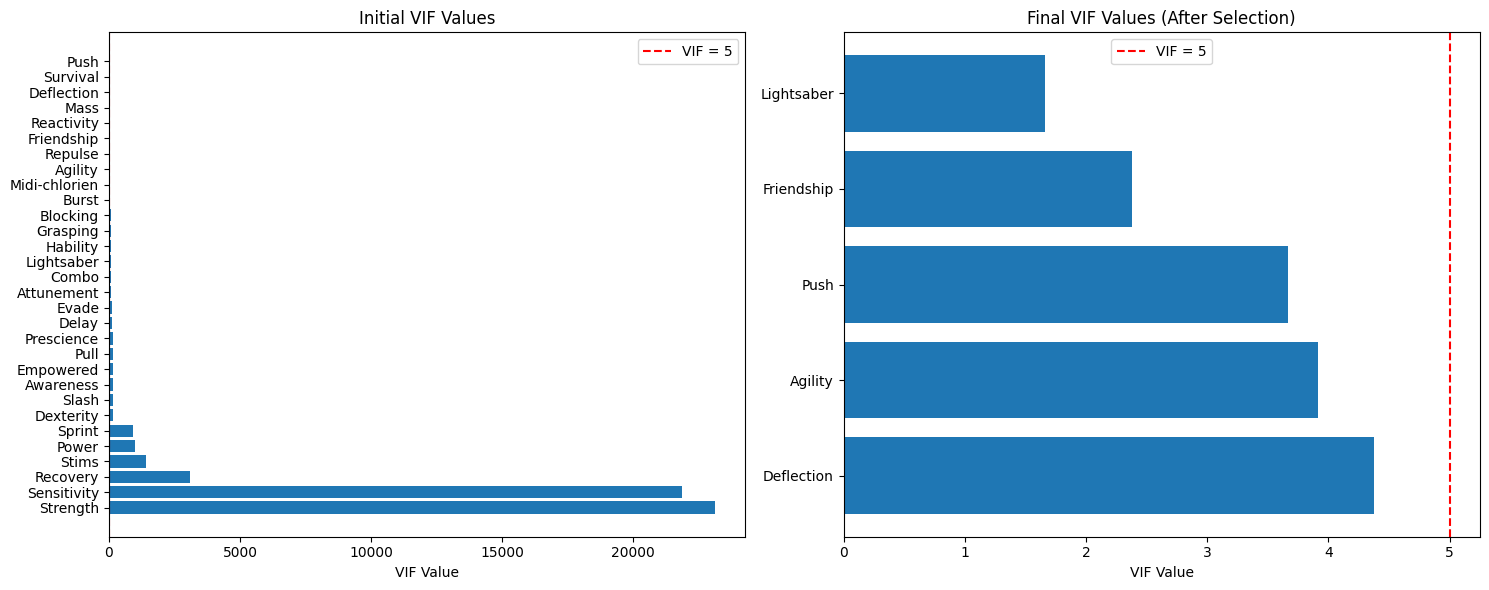


Final selected dataset shape: (398, 5)
Selected features: ['Agility', 'Push', 'Lightsaber', 'Friendship', 'Deflection']


In [2]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

class FeatureSelection:
    def __init__(self):
        self.scaler = MinMaxScaler()
        self.selected_features = None
        self.vif_results = None
        
    def load_and_prepare_data(self, train_path="../Train_knight.csv", test_path="../Test_knight.csv"):
        """Load and prepare the training and test data"""
        self.df_train = pd.read_csv(train_path)
        self.df_test = pd.read_csv(test_path)
        
        # Prepare training features (exclude target)
        self.X_train = self.df_train.drop('knight', axis=1)
        
        # Scale the features
        X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.df_train_scaled = pd.DataFrame(X_train_scaled, columns=self.X_train.columns)
        
        print(f"Original dataset shape: {self.X_train.shape}")
        print(f"Features: {list(self.X_train.columns)}")
        
    def calculate_vif(self, X):
        """Calculate VIF for all features in the dataset"""
        vif_data = pd.DataFrame()
        vif_data["Feature"] = X.columns
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif_data["Tolerance"] = 1 / vif_data["VIF"]
        
        return vif_data.sort_values('VIF', ascending=False)
    
    def display_vif_results(self, vif_data, title="VIF Results"):
        """Display VIF results in a formatted table"""
        print(f"\n{title}")
        print("=" * 50)
        print(f"{'Feature':<15} {'VIF':<12} {'Tolerance':<12}")
        print("-" * 50)
        
        for _, row in vif_data.iterrows():
            print(f"{row['Feature']:<15} {row['VIF']:<12.6f} {row['Tolerance']:<12.6f}")
    
    def remove_high_vif_features(self, X, vif_threshold=5.0):
        """
        Iteratively remove features with VIF > threshold
        """
        features_to_keep = list(X.columns)
        removed_features = []
        
        while True:
            # Calculate VIF for current features
            X_current = X[features_to_keep]
            vif_data = self.calculate_vif(X_current)
            
            # Find features with VIF > threshold
            high_vif_features = vif_data[vif_data['VIF'] > vif_threshold]
            
            if len(high_vif_features) == 0:
                break
                
            # Remove the feature with highest VIF
            feature_to_remove = high_vif_features.iloc[0]['Feature']
            features_to_keep.remove(feature_to_remove)
            removed_features.append(feature_to_remove)
            
            print(f"Removed '{feature_to_remove}' (VIF: {high_vif_features.iloc[0]['VIF']:.6f})")
        
        return features_to_keep, removed_features
    
    def perform_feature_selection(self, vif_threshold=5.0):
        """
        Main method to perform feature selection using VIF
        """
        print("FEATURE SELECTION USING VARIANCE INFLATION FACTOR (VIF)")
        print("=" * 60)
        
        # Calculate initial VIF
        print("\n1. Initial VIF Analysis:")
        initial_vif = self.calculate_vif(self.df_train_scaled)
        self.display_vif_results(initial_vif, "Initial VIF Values")
        
        # Check for multicollinearity
        high_vif_count = len(initial_vif[initial_vif['VIF'] > vif_threshold])
        print(f"\nFeatures with VIF > {vif_threshold}: {high_vif_count}")
        
        if high_vif_count > 0:
            print(f"\nMulticollinearity detected! Removing features with VIF > {vif_threshold}")
            print("\n2. Feature Removal Process:")
            
            # Remove high VIF features iteratively
            selected_features, removed_features = self.remove_high_vif_features(
                self.df_train_scaled, vif_threshold
            )
            
            # Calculate final VIF
            X_final = self.df_train_scaled[selected_features]
            final_vif = self.calculate_vif(X_final)
            
            print(f"\n3. Final Results:")
            print(f"Features removed: {removed_features}")
            print(f"Features kept: {selected_features}")
            print(f"Original features: {self.df_train_scaled.shape[1]}")
            print(f"Selected features: {len(selected_features)}")
            print(f"Reduction: {self.df_train_scaled.shape[1] - len(selected_features)} features")
            
            self.display_vif_results(final_vif, "Final VIF Values")
            
            # Store results
            self.selected_features = selected_features
            self.vif_results = {
                'initial': initial_vif,
                'final': final_vif,
                'removed_features': removed_features
            }
            
        else:
            print(f"\nNo multicollinearity detected. All features have VIF <= {vif_threshold}")
            self.selected_features = list(self.df_train_scaled.columns)
            self.vif_results = {'initial': initial_vif, 'final': initial_vif, 'removed_features': []}
    
    def plot_vif_comparison(self):
        """Plot VIF values before and after feature selection"""
        if self.vif_results is None:
            print("Please run feature selection first!")
            return
            
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        
        # Plot initial VIF
        initial_vif = self.vif_results['initial']
        ax1.barh(range(len(initial_vif)), initial_vif['VIF'])
        ax1.set_yticks(range(len(initial_vif)))
        ax1.set_yticklabels(initial_vif['Feature'])
        ax1.axvline(x=5, color='red', linestyle='--', label='VIF = 5')
        ax1.set_xlabel('VIF Value')
        ax1.set_title('Initial VIF Values')
        ax1.legend()
        
        # Plot final VIF
        final_vif = self.vif_results['final']
        ax2.barh(range(len(final_vif)), final_vif['VIF'])
        ax2.set_yticks(range(len(final_vif)))
        ax2.set_yticklabels(final_vif['Feature'])
        ax2.axvline(x=5, color='red', linestyle='--', label='VIF = 5')
        ax2.set_xlabel('VIF Value')
        ax2.set_title('Final VIF Values (After Selection)')
        ax2.legend()
        
        plt.tight_layout()
        plt.show()
    
    def get_selected_data(self):
        """Return the dataset with only selected features"""
        if self.selected_features is None:
            print("Please run feature selection first!")
            return None
            
        return self.df_train_scaled[self.selected_features]

# Example usage
if __name__ == "__main__":
    # Initialize the feature selection class
    fs = FeatureSelection()
    
    # Load and prepare data
    fs.load_and_prepare_data()
    
    # Perform feature selection using VIF
    fs.perform_feature_selection(vif_threshold=5.0)
    
    # Plot comparison
    fs.plot_vif_comparison()
    
    # Get the final selected dataset
    selected_data = fs.get_selected_data()
    print(f"\nFinal selected dataset shape: {selected_data.shape}")
    print(f"Selected features: {list(selected_data.columns)}")
    